In [288]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA as SklearnPCA
from scipy.linalg import null_space
import numpy as np


### Data Loading and FNR Evaluation Function


In [289]:
def evaluate_sensitive_attribute(df, sensitive_attribute, group_name_str):
    # Separate features (X) and target (y)
    X = df.drop(['pass_bar'], axis=1)  # Drop the target column
    y = df['pass_bar']  # Assuming 'pass_bar' is your target column
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize numerical features if necessary
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Train a logistic regression model
    model = LogisticRegression(max_iter=200, class_weight='balanced', solver='liblinear')
    model.fit(X_train, y_train)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # Print results for the current sensitive attribute
    print(f"\nEvaluation for {sensitive_attribute} - Group: {group_name_str}")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity (True Positive Rate): {sensitivity}")
    print(f"Specificity (True Negative Rate): {specificity}")
    print(f"False Negative Rate: {fnr}")
    
    # Print classification report for more detailed metrics
    print(f"\nClassification Report for {sensitive_attribute} - Group: {group_name_str}")
    print(classification_report(y_test, y_pred))
    
    # Store results in a structured format
    results = {
        'Attribute': sensitive_attribute,
        'Group': group_name_str,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'FNR': fnr
    }
    
    return results


In [290]:

# Function to evaluate overall logistic regression model
def evaluate_overall(df):
    # Separate features (X) and target (y)
    X = df.drop(['pass_bar'], axis=1)  # Drop the target column
    y = df['pass_bar']  # Assuming 'pass_bar' is your target column
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize numerical features if necessary
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Train a logistic regression model
    model = LogisticRegression(max_iter=200, class_weight='balanced', solver='liblinear')
    model.fit(X_train, y_train)
    
    # Evaluate on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    fnr = fn / (fn + tp)  # False Negative Rate
    
    # Print overall results
    print("\nOverall Evaluation Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Sensitivity (True Positive Rate): {sensitivity}")
    print(f"Specificity (True Negative Rate): {specificity}")
    print(f"False Negative Rate: {fnr}")
    
    # Print classification report for more detailed metrics
    print("\nClassification Report - Overall")
    print(classification_report(y_test, y_pred))
    
    # Store overall results in a structured format
    overall_results = {
        'Attribute': True,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'FNR': fnr
    }
    
    return overall_results

# Load dataset
df = pd.read_csv('data/non_scaled_data.csv')

# Map column names to readable group names
race1_map = {
    'race1_asian': 'Asian',
    'race1_black': 'Black',
    'race1_hisp': 'Hisp',
    'race1_other': 'Other',
    'race1_white': 'White'
}

gender_map = {
    1: 'Male',
    0: 'Female'
}

# Group data by sensitive attribute and evaluate for each group
sensitive_attributes = ['race1', 'gender']
results = []

for sensitive_attribute in sensitive_attributes:
    print(f"\nSensitive Attribute: {sensitive_attribute}")
    
    # Evaluate logistic regression model for each subgroup
    if sensitive_attribute == 'race1':
        # For race1, iterate over each race category
        for col in ['race1_asian', 'race1_black', 'race1_hisp', 'race1_other', 'race1_white']:
            group_name_str = race1_map[col]
            group_df = df[df[col] == 1.0]  # Filter rows where the race1 category is 1.0 (True)
            subgroup_results = evaluate_sensitive_attribute(group_df, sensitive_attribute, group_name_str)
            results.append(subgroup_results)
    else:
        # For gender, iterate over each gender category
        for group_name, group_name_str in gender_map.items():
            group_df = df[df['gender'] == group_name]  # Filter rows where gender matches the current category
            subgroup_results = evaluate_sensitive_attribute(group_df, sensitive_attribute, group_name_str)
            results.append(subgroup_results)

# Evaluate overall performance on the entire dataset
overall_results = evaluate_overall(df)
results.append(overall_results)

# Display results for each subgroup within each sensitive attribute and overall
print("\nSummary of Results:")
for result in results:
    print(result)



Sensitive Attribute: race1

Evaluation for race1 - Group: Asian
Accuracy: 0.7388888888888889
Sensitivity (True Positive Rate): 0.7391304347826086
Specificity (True Negative Rate): 0.7368421052631579
False Negative Rate: 0.2608695652173913

Classification Report for race1 - Group: Asian
              precision    recall  f1-score   support

           0       0.25      0.74      0.37        19
           1       0.96      0.74      0.84       161

    accuracy                           0.74       180
   macro avg       0.60      0.74      0.60       180
weighted avg       0.88      0.74      0.79       180


Evaluation for race1 - Group: Black
Accuracy: 0.6654275092936803
Sensitivity (True Positive Rate): 0.6390243902439025
Specificity (True Negative Rate): 0.75
False Negative Rate: 0.36097560975609755

Classification Report for race1 - Group: Black
              precision    recall  f1-score   support

           0       0.39      0.75      0.52        64
           1       0.89      

/var/folders/kk/cjvhrlcd2d3b4mbcr9q9bh900000gp/T/ipykernel_80874/539451996.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race Subgroup', y='FNR', data=race_accuracy_df, palette="viridis", ax=ax1)
/var/folders/kk/cjvhrlcd2d3b4mbcr9q9bh900000gp/T/ipykernel_80874/539451996.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
/var/folders/kk/cjvhrlcd2d3b4mbcr9q9bh900000gp/T/ipykernel_80874/539451996.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender Subgroup', y='FNR', data=gender_accuracy_df, palette="viridis", ax=ax2)
/var/folders/k

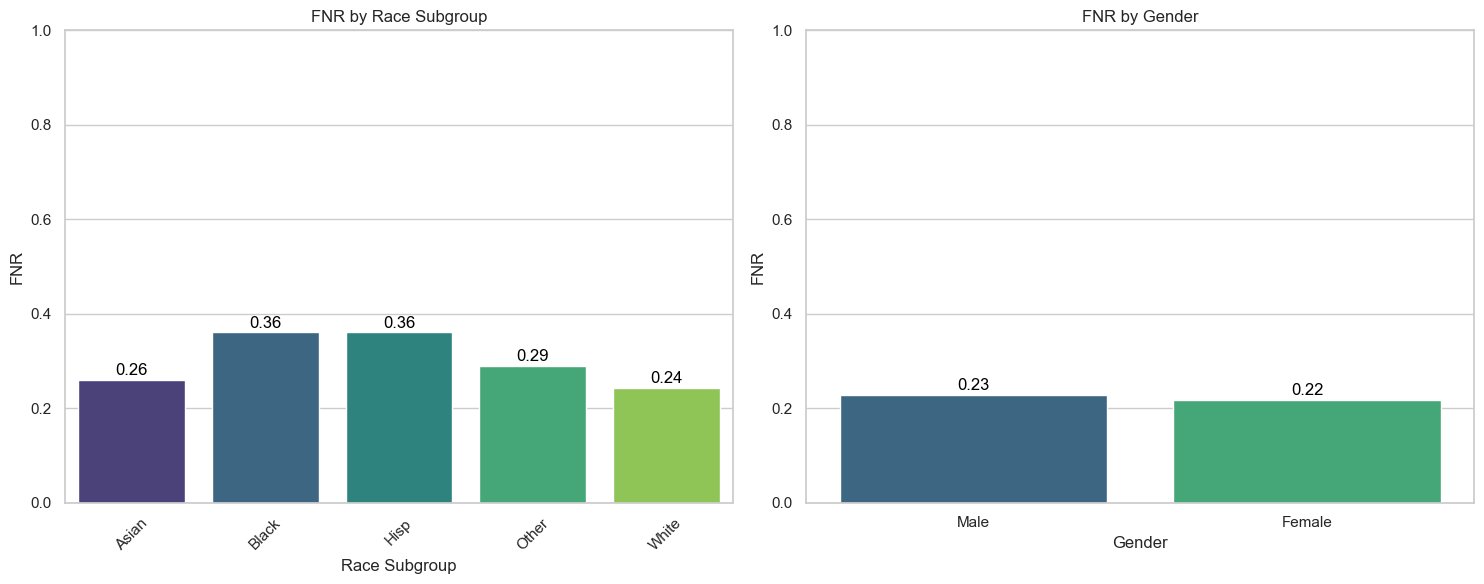

In [291]:
# Extract accuracy scores for each race subgroup
race_subgroups = [result['Group'] for result in results if result['Attribute'] == 'race1']
race_accuracy_scores = [result['FNR'] for result in results if result['Attribute'] == 'race1']

# Extract accuracy scores for each gender subgroup
gender_subgroups = [result['Group'] for result in results if result['Attribute'] == 'gender']
gender_accuracy_scores = [result['FNR'] for result in results if result['Attribute'] == 'gender']

# Create a DataFrame for plotting race accuracy
race_accuracy_df = pd.DataFrame({'Race Subgroup': race_subgroups, 'FNR': race_accuracy_scores})

# Create a DataFrame for plotting gender accuracy
gender_accuracy_df = pd.DataFrame({'Gender Subgroup': gender_subgroups, 'FNR': gender_accuracy_scores})

# Set plot style
sns.set(style="whitegrid")

# Create figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

# Plot for race accuracy scores
sns.barplot(x='Race Subgroup', y='FNR', data=race_accuracy_df, palette="viridis", ax=ax1)
ax1.set_title('FNR by Race Subgroup')
ax1.set_xlabel('Race Subgroup')
ax1.set_ylabel('FNR')
ax1.set_ylim(0, 1)  # Set y-axis limit from 0 to 1
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Annotate race accuracy scores on bars
for index, row in race_accuracy_df.iterrows():
    ax1.text(index, row['FNR'] + 0.01, f'{row["FNR"]:.2f}', color='black', ha="center")

# Plot for gender accuracy scores
sns.barplot(x='Gender Subgroup', y='FNR', data=gender_accuracy_df, palette="viridis", ax=ax2)
ax2.set_title('FNR by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('FNR')
ax2.set_ylim(0, 1)  # Set y-axis limit from 0 to 1
ax2.set_xticklabels(ax2.get_xticklabels())

# Annotate gender FNR scores on bars
for index, row in gender_accuracy_df.iterrows():
    ax2.text(index, row['FNR'] + 0.01, f'{row["FNR"]:.2f}', color='black', ha="center")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [292]:
from sklearn.model_selection import train_test_split



def preprocess_and_split_data(df, scale):
    # Define features and target
    features = df.drop('pass_bar', axis=1)  # Drop the target column to get features
    target = df['pass_bar']

    # Define groups (race and gender)
    groups = df[['race1_asian', 'race1_black', 'race1_hisp', 'race1_other', 'gender']]

    # Drop unnecessary columns from features
    features.drop(['race1_asian', 'race1_black', 'race1_hisp', 'race1_other', 'gender'], axis=1, inplace=True)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
        features, target, groups, test_size=0.3, random_state=0, shuffle=True
    )

    if scale:
        # Standardize numerical features if necessary
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        

    return X_train, X_test, y_train, y_test, group_train, group_test


df = pd.read_csv('data/non_scaled_data.csv')
# Preprocess and split data
X_train, X_test, y_train, y_test, group_train, group_test = preprocess_and_split_data(df, scale=True)

# Printing the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("group_train shape:", group_train.shape)
print("group_test shape:", group_test.shape)

X_train shape: (15684, 11)
X_test shape: (6723, 11)
y_train shape: (15684,)
y_test shape: (6723,)
group_train shape: (15684, 5)
group_test shape: (6723, 5)


In [293]:



def PCA(X_train, n_components):
    """ Implements sci-kit's version of basic PCA and returns sorted eigenvectors"""
    
    pca = SklearnPCA(n_components=n_components)
    X_PCA = pca.fit_transform(X_train)
    
    # Get the sorted eigenvalues and eigenvectors
    eigenvalues = pca.explained_variance_
    eigenvectors = pca.components_
    
    # Sort eigenvectors based on eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Reverse order to get descending
    sorted_eig_vectors = eigenvectors[sorted_indices]
    
    return X_PCA, sorted_eig_vectors


def fair_PCA(X_train, groups, n_components=None):
    """Implements fair PCA ensuring components are orthogonal to protected features."""
    
    X = X_train
    Z = groups.astype(int)
    
    # Compute Z.T @ X
    ZTX = np.dot(Z.T, X)
    
    # Compute null space of ZTX
    R = null_space(ZTX)

    
    # Dimension of the null space
    null_space_dim = R.shape[0]
    
    # Compute R.T @ X.T @ X @ R
    RTXXR = np.dot(np.dot(R.T, np.dot(X.T, X)), R)

    # Perform eigen decomposition on RTXXR
    eig_vals, eig_vectors = np.linalg.eig(RTXXR)


    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eig_vals)[::-1]
    sorted_eig_vectors = eig_vectors[:, sorted_indices]
    
    # Select the top k eigenvectors
    top_k_eig_vectors = sorted_eig_vectors[:, :15]


    # Compute matrix U which is R @ top_k_eig_vectors
    U = np.dot(R, top_k_eig_vectors)

    # Project X onto U to get the Fair PCA components
    X_fair_PCA = np.dot(X, U)

    
    return X_fair_PCA, U

fair_PCA_data = fair_PCA(X_train, group_train)



In [294]:

def corr_plot(X_train, groups, n_components=6, fair=True):
    """Plots the correlation between PCA components and protected features"""
    
    protected_features = groups 
    fig, axes = plt.subplots(figsize=(25, 5))

    if fair:
        # Get the fairPCA transformed data
        X_PCA_n, U = fair_PCA(X_train, groups, n_components)
    else:
        # Get the PCA transformed data
        X_PCA_n, sorted_eigen = PCA(X_train, n_components)

    protected_features = protected_features.astype(int)

    # Compute correlation between PCA components and protected features
    corr_matrix = np.corrcoef(np.column_stack((protected_features, X_PCA_n)).T)

    # Display only the correlation between PCA components and protected features
    corr_matrix = np.nan_to_num(corr_matrix[:protected_features.shape[1], protected_features.shape[1]:], nan=0.0)

    # Determine the range for x-axis labels based on the length of corr_matrix
    x_labels_range = range(1, corr_matrix.shape[1] + 1)

    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, vmin=-.1, vmax=.1, square=True, ax=axes, fmt=".2f")
    if fair:
        axes.set_xticklabels(x_labels_range)
        axes.set_title(f"Corr between Fair PCA and Prot. features")
    else:
        axes.set_xticklabels(x_labels_range)
        axes.set_title(f"Corr between PCA and Prot. features")

    axes.set_yticklabels(['Asian', 'Black', 'Hispanic', 'Other', 'Gender'], va='center')
    axes.set_xlabel("Component")
    axes.set_ylabel("Protected Feature (Subgroup)")

    plt.tight_layout()
    plt.show()


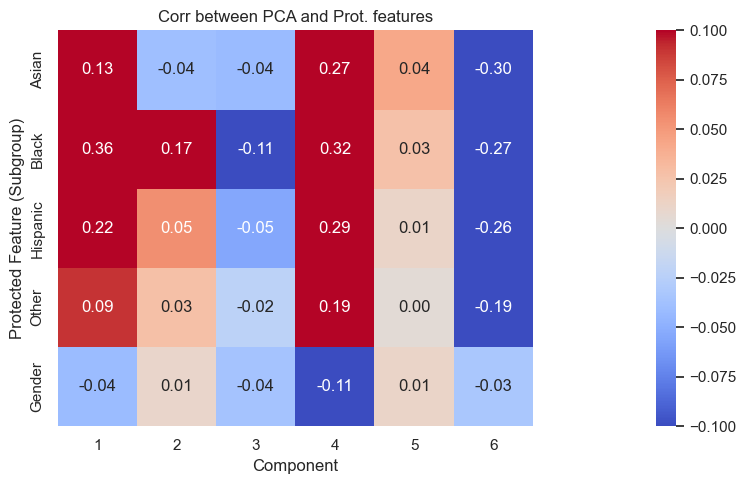

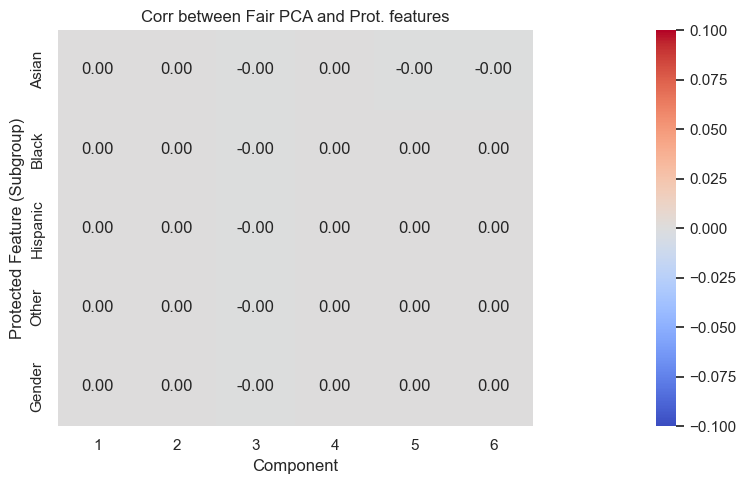

In [295]:
corr_plot(X_train, group_train, fair=False)
corr_plot(X_train, group_train, fair=True)

In [297]:
fair_PCA_data

(array([[-0.02331036,  1.055605  , -0.11451093, -1.16803007,  0.2566339 ,
         -0.06879034],
        [-1.19075623, -1.24678378, -2.77641526,  0.46310547, -0.24371715,
          0.00483879],
        [ 0.99023231, -0.0133253 , -0.18992884,  0.75868361,  0.12078781,
         -0.02549978],
        ...,
        [ 1.09041606,  0.72070708, -0.35311907, -0.44880289,  0.0838243 ,
         -0.06952295],
        [ 0.26628403,  0.53398928, -0.14174458, -0.38750665, -0.08799137,
         -0.02819265],
        [ 0.75153974,  1.11011261, -0.33582118, -0.66040081, -0.27104932,
         -0.10632095]]),
 array([[ 0.30851249, -0.13102191, -0.08939409,  0.14176352, -0.40324052,
         -0.71534719],
        [ 0.19636593, -0.02608751,  0.02839774,  0.1229679 ,  0.72858748,
         -0.02019279],
        [ 0.2774453 , -0.09104874, -0.07407664,  0.09668484, -0.39982765,
          0.69372686],
        [-0.27545777, -0.16135158,  0.1683468 , -0.29281913,  0.19388113,
         -0.01804582],
        [ 0.096

In [296]:
evaluate_sensitive_attribute(fair_PCA_data, race1, 'race1_black')

NameError: name 'race1' is not defined

In [ ]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Get PCA components
X_train_PCA, sorted_eig_vectors = PCA(X_train, X_train.shape[1])
X_test_PCA = X_test @ sorted_eig_vectors

# Get debiased data
X_train_fair_PCA, U = fair_PCA(X_train, group_train)
X_test_fair_PCA = X_test @ U

# Logistic Regression model on non-transformed data
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Logistic Regression model on PCA transformed data
lr_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_pca.fit(X_train_PCA, y_train)
y_pred_pca_lr = lr_pca.predict(X_test_PCA)
accuracy_pca_lr = accuracy_score(y_test, y_pred_pca_lr)
f1_pca_lr = f1_score(y_test, y_pred_pca_lr)

# Logistic Regression model on debiased data
lr_fair_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_fair_pca.fit(X_train_fair_PCA, y_train)
y_pred_fair_pca_lr = lr_fair_pca.predict(X_test_fair_PCA)
accuracy_fair_pca_lr = accuracy_score(y_test, y_pred_fair_pca_lr)
f1_fair_pca_lr = f1_score(y_test, y_pred_fair_pca_lr)

print("Accuracy for non-transformed data (Logistic Regression):", round(accuracy_lr, 2))
print("Accuracy for PCA transformed data (Logistic Regression):", round(accuracy_pca_lr, 2))
print("Accuracy for fairPCA transformed data (Logistic Regression):", round(accuracy_fair_pca_lr, 2))

print("F1 score for non-transformed data (Logistic Regression):", round(f1_lr, 2))
print("F1 score for PCA transformed data (Logistic Regression):", round(f1_pca_lr, 2))
print("F1 score for fairPCA transformed data (Logistic Regression):", round(f1_fair_pca_lr, 2))


Accuracy for non-transformed data (Logistic Regression): 0.95
Accuracy for PCA transformed data (Logistic Regression): 0.95
Accuracy for fairPCA transformed data (Logistic Regression): 0.95
F1 score for non-transformed data (Logistic Regression): 0.97
F1 score for PCA transformed data (Logistic Regression): 0.97
F1 score for fairPCA transformed data (Logistic Regression): 0.97


In [ ]:


X_train_non_scaled, X_test_non_scaled, y_train_non_scaled, y_test_non_scaled, group_train_non_scaled, group_test_non_scaled = preprocess_and_split_data(df, scale=False)


In [ ]:
X_test_male = X_test_non_scaled.loc[group_test_non_scaled['gender'] == 1]
y_test_male = y_test_non_scaled.loc[group_test_non_scaled['gender'] == 1]


X_test_female = X_test_non_scaled.loc[group_test_non_scaled['gender'] == 0]
y_test_female = y_test_non_scaled.loc[group_test_non_scaled['gender'] == 0]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming PCA and fair_PCA functions are already defined
# and X_train, X_test, y_train, y_test, group_train, group_test are already preprocessed and split

# Get PCA components
X_train_scaled_PCA, sorted_eig_vectors = PCA(X_train, X_train.shape[1])
X_test_scaled_PCA = X_test @ sorted_eig_vectors

# Get debiased data
X_train_fair_PCA, U = fair_PCA(X_train, group_train)
X_test_fair_PCA = X_test @ U

# Step 2: Train the Logistic Regression model on PCA-transformed data
fair_model = LogisticRegression()
fair_model.fit(X_train_fair_PCA, y_train)

# Step 3: Predict labels for the test set
y_pred = fair_model.predict(X_test_fair_PCA)

# Step 4: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Apply PCA transformation to X_test_male
X_test_male_PCA = X_test_male @ U

# Predict labels for men
y_pred_men = fair_model.predict(X_test_male_PCA)

# Calculate accuracy for men
accuracy_men = accuracy_score(y_test_male, y_pred_men)
print("Accuracy for men:", accuracy_men)

# Apply PCA transformation to X_test_female
X_test_female_PCA = X_test_female @ U

# Predict labels for women
y_pred_women = fair_model.predict(X_test_female_PCA)

# Calculate accuracy for women
accuracy_women = accuracy_score(y_test_female, y_pred_women)
print("Accuracy for women:", accuracy_women)


Accuracy: 0.9461549903316971
Accuracy for men: 0.9551181102362205
Accuracy for women: 0.9347751458976999


In [ ]:
# Sanity check to make sure we are using the correct observations
print(X_test_fair_PCA.shape[0] == X_test.shape[0])

True


In [ ]:

# Train a logistic regression model using the standardized data that has not been pca transformed
standard_model = LogisticRegression(max_iter=200, class_weight='balanced', solver='liblinear')
standard_model.fit(X_train, y_train)



LogisticRegression(class_weight='balanced', max_iter=200, solver='liblinear')

In [ ]:

filtered_data = X_test_non_scaled.loc[group_test_non_scaled['gender'] == 0]

print(filtered_data.shape)

# Step 4: Calculate the predicted probabilities for these data points
probabilities = standard_model.predict_proba(filtered_data)

# Calculate the absolute difference between the probabilities of the two classes
prob_diff = np.abs(probabilities[:, 0] - probabilities[:, 1])

# Create a structured array to hold the filtered data and the probabilities
filtered_data_with_probs = np.column_stack((filtered_data, probabilities, prob_diff))

# Define column names for the structured array
column_names = [f'feature_{i}' for i in range(filtered_data.shape[1])] + ['prob_class_0', 'prob_class_1', 'prob_diff']

# Convert the structured array to a pandas DataFrame for easier sorting
filtered_data_df = pd.DataFrame(filtered_data_with_probs, columns=column_names)

# Step 5: Sort the data by the absolute difference between the class probabilities in ascending order
sorted_filtered_data = filtered_data_df.sort_values(by='prob_diff')

# Output the top 10 data points where the probabilities are most balanced
top_10_balanced = sorted_filtered_data.head(10)

# Display the probabilities for the top 10 balanced data points
for index, row in top_10_balanced.iterrows():
    print(f"Index: {index}, Probabilities: Class 0 = {row['prob_class_0']}, Class 1 = {row['prob_class_1']}")






(2913, 11)
Index: 1164, Probabilities: Class 0 = 1.3123946374093975e-11, Class 1 = 0.999999999986876
Index: 443, Probabilities: Class 0 = 9.654277377535436e-12, Class 1 = 0.9999999999903457
Index: 1881, Probabilities: Class 0 = 8.532063944244328e-12, Class 1 = 0.9999999999914679
Index: 2647, Probabilities: Class 0 = 5.956346527113965e-12, Class 1 = 0.9999999999940437
Index: 1604, Probabilities: Class 0 = 4.8123727225402035e-12, Class 1 = 0.9999999999951876
Index: 2249, Probabilities: Class 0 = 4.605427150750074e-12, Class 1 = 0.9999999999953946
Index: 2417, Probabilities: Class 0 = 2.5848212459322895e-12, Class 1 = 0.9999999999974152
Index: 594, Probabilities: Class 0 = 1.906697022491244e-12, Class 1 = 0.9999999999980933
Index: 858, Probabilities: Class 0 = 1.7428281040565707e-12, Class 1 = 0.9999999999982572
Index: 2583, Probabilities: Class 0 = 1.6064927166326015e-12, Class 1 = 0.9999999999983935


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
for i in top_10_balanced.index:
    # Extract the ith observation from the X_test that only consists of the female observations
    observation = filtered_data.loc[i].values  # Extract row as a numpy array

    # Reshape the observation to match the expected input shape for prediction
    observation = observation.reshape(1, -1)  # Reshape to (1, n_features) if necessary

    # Predict probabilities using the trained standard model
    probabilities_standard = standard_model.predict_proba(observation)

    # Print the probabilities for each class for the standard model
    print(f"Probabilities for observation {i} in the standardize non-transformed dataset: Class 0 = {probabilities_standard[0, 0]}, Class 1 = {probabilities_standard[0, 1]}")

    # Extract the ith observation from X_test_fair_PCA
    observation_fairPCA = X_test_fair_PCA[i].reshape(1, -1)

    # Predict probabilities using the trained fair model
    probabilities_fairPCA = fair_model.predict_proba(observation_fairPCA)


    # Print the probabilities for each class for the fair model
    print(f"Probabilities for observation {i} in the fairPCA transformed dataset: Class 0 = {probabilities_fairPCA[0, 0]}, Class 1 = {probabilities_fairPCA[0, 1]}")
    print('\n')


KeyError: 1164

In [ ]:


Summary of Results:
{'Attribute': 'race1', 'Group': 'Asian',   'FNR': 0.2608695652173913}
{'Attribute': 'race1', 'Group': 'Black', ''FNR': 0.36097560975609755}
{'Attribute': 'race1', 'Group': 'Hisp',  , 'FNR': 0.3611111111111111}
{'Attribute': 'race1', 'Group': 'Other', , 'FNR': 0.2894736842105263}
{'Attribute': 'race1', 'Group': 'White',  'FNR': 0.24290828972734785}
{'Attribute': 'gender', 'Group': 'Male',  'FNR': 0.22802653399668324}
{'Attribute': 'gender', 'Group': 'Female', 'FNR': 0.2181916621548457}